<a href="https://colab.research.google.com/github/KTSNVaishnavi/Machine-Learning/blob/main/Ensemble_Learning1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [291]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [292]:
import os
path='/content/gdrive/MyDrive/MachineLearning'
os.chdir(path)

In [293]:
#to read the data
import pandas as pd
import numpy as np
#for data preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
# for modelling
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.svm import SVC,SVR
# Performance Metrics
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt 
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier  

In [294]:
data=pd.read_excel('HR Attrition.xlsx')

In [295]:
data.head(10)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,College,Life Sciences,1,Medium,Female,...,Low,80,0,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,Below_college,Life Sciences,2,High,Male,...,Very High,80,1,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,College,Other,4,Very high,Male,...,Medium,80,0,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,Master,Life Sciences,5,Very high,Female,...,High,80,0,8,3,Better,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,Below_college,Medical,7,Low,Male,...,Very High,80,1,6,3,Better,2,2,2,2
5,32,No,Travel_Frequently,Research & Development,2,College,Life Sciences,8,Very high,Male,...,High,80,0,8,2,Good,7,7,3,6
6,59,No,Travel_Rarely,Research & Development,3,Bachelor,Medical,10,High,Female,...,Low,80,3,12,3,Good,1,0,0,0
7,30,No,Travel_Rarely,Research & Development,24,Below_college,Life Sciences,11,Very high,Male,...,Medium,80,1,1,2,Better,1,0,0,0
8,38,No,Travel_Frequently,Research & Development,23,Bachelor,Life Sciences,12,Very high,Male,...,Medium,80,0,10,2,Better,9,7,1,8
9,36,No,Travel_Rarely,Research & Development,27,Bachelor,Medical,13,High,Male,...,Medium,80,2,17,3,Good,7,7,7,7


In [296]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [297]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                   object
EducationField              object
EmployeeNumber               int64
EnvironmentSatisfaction     object
Gender                      object
JobInvolvement              object
JobLevel                     int64
JobRole                     object
JobSatisfaction             object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating           object
RelationshipSatisfaction    object
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance             object
YearsAtCompany               int64
YearsInCurrentRole  

In [298]:
data.describe(include='all')

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470,1470.000000,1470,1470,1470.000000,1470,1470,...,1470,1470.0,1470.000000,1470.000000,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,3,NaN,5,6,NaN,4,2,...,4,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,Research & Development,NaN,Bachelor,Life Sciences,NaN,High,Male,...,High,NaN,NaN,NaN,NaN,Better,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,961,NaN,572,606,NaN,453,882,...,459,NaN,NaN,NaN,NaN,893,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,NaN,9.192517,NaN,NaN,1024.865306,NaN,NaN,...,NaN,80.0,0.793878,11.279592,2.799320,NaN,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,NaN,8.106864,NaN,NaN,602.024335,NaN,NaN,...,NaN,0.0,0.852077,7.780782,1.289271,NaN,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,NaN,1.000000,NaN,NaN,1.000000,NaN,NaN,...,NaN,80.0,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,NaN,2.000000,NaN,NaN,491.250000,NaN,NaN,...,NaN,80.0,0.000000,6.000000,2.000000,NaN,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,NaN,7.000000,NaN,NaN,1020.500000,NaN,NaN,...,NaN,80.0,1.000000,10.000000,3.000000,NaN,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,NaN,14.000000,NaN,NaN,1555.750000,NaN,NaN,...,NaN,80.0,1.000000,15.000000,3.000000,NaN,9.000000,7.000000,3.000000,7.000000


In [299]:
# Train Test Split
X_train,X_test,y_train,y_test=train_test_split(data.loc[:,data.columns!='Attrition'],data['Attrition'],test_size=0.10,random_state=100)

In [300]:
X_train.shape

(1323, 30)

In [301]:
y_train.shape


(1323,)

In [302]:
y_test.shape

(147,)

In [303]:
y_train.value_counts(normalize=True)*100

No     83.749055
Yes    16.250945
Name: Attrition, dtype: float64

In [304]:
y_train.value_counts()

No     1108
Yes     215
Name: Attrition, dtype: int64

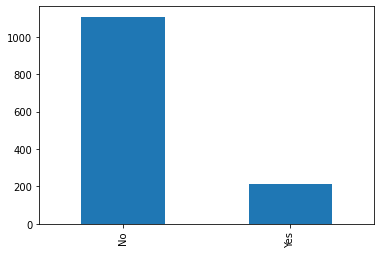

In [305]:
y_train.value_counts().plot(kind='bar')


In [306]:
X_train.columns

Index(['Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [307]:
#converting numeric to categorical
dropcols=['EmployeeNumber','StandardHours','Over18']

catcols=['BusinessTravel', 'Department','Education',
       'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'JobInvolvement','JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus','NumCompaniesWorked',
       'OverTime','PerformanceRating',
       'RelationshipSatisfaction','StockOptionLevel','TrainingTimesLastYear', 'WorkLifeBalance']
X_train[catcols]=X_train[catcols].astype('category')
X_train.dtypes
y_train=y_train.astype('category')
y_test=y_test.astype('category')

In [308]:
X_test[catcols]=X_test[catcols].astype('category')
X_test.dtypes

Age                            int64
BusinessTravel              category
Department                  category
DistanceFromHome               int64
Education                   category
EducationField              category
EmployeeNumber                 int64
EnvironmentSatisfaction     category
Gender                      category
JobInvolvement              category
JobLevel                    category
JobRole                     category
JobSatisfaction             category
MaritalStatus               category
MonthlyIncome                  int64
NumCompaniesWorked          category
Over18                        object
OverTime                    category
PercentSalaryHike              int64
PerformanceRating           category
RelationshipSatisfaction    category
StandardHours                  int64
StockOptionLevel            category
TotalWorkingYears              int64
TrainingTimesLastYear       category
WorkLifeBalance             category
YearsAtCompany                 int64
Y

In [309]:
#dropping the unnecessary columns
X_train=X_train.drop(dropcols,axis=1)
X_test=X_test.drop(dropcols,axis=1)

In [310]:
X_test_num=X_test.drop(catcols,axis=1)
X_test_cat=X_test[catcols]

In [311]:
#separating numeric and categorical
X_train_num=X_train.drop(catcols,axis=1)
X_train_cat=X_train[catcols]

In [312]:
# #imputing na values
imputenum=SimpleImputer(strategy='mean')
imputecat=SimpleImputer(strategy='most_frequent')
X_train_num=pd.DataFrame(imputenum.fit_transform(X_train_num),columns=X_train_num.columns)
X_train_cat=pd.DataFrame(imputecat.fit_transform(X_train_cat),columns=X_train_cat.columns)
X_test_num=pd.DataFrame(imputenum.transform(X_test_num),columns=X_test_num.columns)
X_test_cat=pd.DataFrame(imputecat.transform(X_test_cat),columns=X_test_cat.columns)

In [313]:
#Standardizing the numeric data
sd=StandardScaler()
X_train_num=pd.DataFrame(sd.fit_transform(X_train_num),columns=X_train_num.columns)
X_test_num=pd.DataFrame(sd.transform(X_test_num),columns=X_test_num.columns)

In [314]:
#Encoding the categorical attributes
ohe=OneHotEncoder(handle_unknown='ignore')
# column=ohe.get_feature_names(X_train_cat.columns
X_train_cat=pd.DataFrame(ohe.fit_transform(X_train_cat).todense(),columns=ohe.get_feature_names_out())

In [315]:
X_train_cat.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,Education_Bachelor,Education_Below_college,Education_College,Education_Doctor,...,TrainingTimesLastYear_1,TrainingTimesLastYear_2,TrainingTimesLastYear_3,TrainingTimesLastYear_4,TrainingTimesLastYear_5,TrainingTimesLastYear_6,WorkLifeBalance_Bad,WorkLifeBalance_Best,WorkLifeBalance_Better,WorkLifeBalance_Good
0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [316]:
X_test_cat=pd.DataFrame(ohe.transform(X_test_cat).todense(),columns=ohe.get_feature_names_out())

In [317]:
Xtrain=pd.concat([X_train_num,X_train_cat],axis=1)
print(Xtrain.shape)
# y_train.shape
Xtrain.dtypes
# print(X_test.shape)

(1323, 90)


Age                        float64
DistanceFromHome           float64
MonthlyIncome              float64
PercentSalaryHike          float64
TotalWorkingYears          float64
                            ...   
TrainingTimesLastYear_6    float64
WorkLifeBalance_Bad        float64
WorkLifeBalance_Best       float64
WorkLifeBalance_Better     float64
WorkLifeBalance_Good       float64
Length: 90, dtype: object

In [318]:
Xtest=pd.concat([X_test_num,X_test_cat],axis=1)
print(Xtest.shape)

(147, 90)


Logistic Regression


In [319]:
print(Xtrain.select_dtypes(include='float64').corr())

                              Age  DistanceFromHome  MonthlyIncome  \
Age                      1.000000          0.000961       0.491754   
DistanceFromHome         0.000961          1.000000      -0.017423   
MonthlyIncome            0.491754         -0.017423       1.000000   
PercentSalaryHike        0.007522          0.030301      -0.026682   
TotalWorkingYears        0.679200          0.003058       0.767964   
...                           ...               ...            ...   
TrainingTimesLastYear_6 -0.045847          0.004535      -0.021998   
WorkLifeBalance_Bad      0.002702          0.004021      -0.029399   
WorkLifeBalance_Best    -0.009125         -0.031082       0.019232   
WorkLifeBalance_Better  -0.011279          0.014893      -0.000237   
WorkLifeBalance_Good     0.018228          0.003405       0.001648   

                         PercentSalaryHike  TotalWorkingYears  YearsAtCompany  \
Age                               0.007522           0.679200        0.309842 

In [320]:
Xtrain=Xtrain.drop(['TotalWorkingYears','WorkLifeBalance_Good'],axis=1)
Xtest=Xtest.drop(['TotalWorkingYears','WorkLifeBalance_Good'],axis=1)
model=LogisticRegressionCV()
log=model.fit(Xtrain, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [321]:
logtrain=model.predict(Xtrain)
logtest=model.predict(Xtest)

In [322]:

print(confusion_matrix(logtrain,y_train))
print(confusion_matrix(logtest,y_test))

[[1082   93]
 [  26  122]]
[[119  10]
 [  6  12]]


In [323]:
print(classification_report(logtrain,y_train))
print(classification_report(logtest,y_test))

              precision    recall  f1-score   support

          No       0.98      0.92      0.95      1175
         Yes       0.57      0.82      0.67       148

    accuracy                           0.91      1323
   macro avg       0.77      0.87      0.81      1323
weighted avg       0.93      0.91      0.92      1323

              precision    recall  f1-score   support

          No       0.95      0.92      0.94       129
         Yes       0.55      0.67      0.60        18

    accuracy                           0.89       147
   macro avg       0.75      0.79      0.77       147
weighted avg       0.90      0.89      0.90       147



Naive Bayes

In [324]:
model=GaussianNB()
naive=model.fit(Xtrain,y_train)

In [325]:
nbtest=naive.predict(Xtest)
nbtrain=naive.predict(Xtrain)
print(confusion_matrix(nbtest,y_test))
print(confusion_matrix(nbtrain,y_train))

[[85  6]
 [40 16]]
[[779  49]
 [329 166]]


In [326]:
print(classification_report(nbtest,y_test))
print(classification_report(nbtrain,y_train))

              precision    recall  f1-score   support

          No       0.68      0.93      0.79        91
         Yes       0.73      0.29      0.41        56

    accuracy                           0.69       147
   macro avg       0.70      0.61      0.60       147
weighted avg       0.70      0.69      0.64       147

              precision    recall  f1-score   support

          No       0.70      0.94      0.80       828
         Yes       0.77      0.34      0.47       495

    accuracy                           0.71      1323
   macro avg       0.74      0.64      0.64      1323
weighted avg       0.73      0.71      0.68      1323



Decision Trees

In [327]:
model=DecisionTreeClassifier(max_leaf_nodes=10,max_depth=10,criterion='gini')
decision=model.fit(Xtrain,y_train)

In [328]:
dectest=decision.predict(Xtest)
dectrain=decision.predict(Xtrain)
print(confusion_matrix(dectest,y_test))
print(confusion_matrix(dectrain,y_train))

[[120  17]
 [  5   5]]
[[1072  135]
 [  36   80]]


In [329]:
print(classification_report(dectest,y_test))
print(classification_report(dectrain,y_train))

              precision    recall  f1-score   support

          No       0.96      0.88      0.92       137
         Yes       0.23      0.50      0.31        10

    accuracy                           0.85       147
   macro avg       0.59      0.69      0.61       147
weighted avg       0.91      0.85      0.87       147

              precision    recall  f1-score   support

          No       0.97      0.89      0.93      1207
         Yes       0.37      0.69      0.48       116

    accuracy                           0.87      1323
   macro avg       0.67      0.79      0.70      1323
weighted avg       0.92      0.87      0.89      1323



KNN

In [330]:
model= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
knn=model.fit(Xtrain,y_train)

In [331]:
knntest=knn.predict(Xtest)
knntrain=knn.predict(Xtrain)
print(confusion_matrix(knntest,y_test))
print(confusion_matrix(knntrain,y_train))

[[123  19]
 [  2   3]]
[[1095  155]
 [  13   60]]


In [332]:
print(classification_report(knntest,y_test))
print(classification_report(knntrain,y_train))

              precision    recall  f1-score   support

          No       0.98      0.87      0.92       142
         Yes       0.14      0.60      0.22         5

    accuracy                           0.86       147
   macro avg       0.56      0.73      0.57       147
weighted avg       0.96      0.86      0.90       147

              precision    recall  f1-score   support

          No       0.99      0.88      0.93      1250
         Yes       0.28      0.82      0.42        73

    accuracy                           0.87      1323
   macro avg       0.63      0.85      0.67      1323
weighted avg       0.95      0.87      0.90      1323



SVC

In [333]:
model=SVC(C=2.0,kernel='rbf',gamma=0.1)
svc=model.fit(Xtrain,y_train)
svctest=model.predict(Xtest)
svctrain=model.predict(Xtrain)

In [334]:
confusion_matrix(svctest,y_test)

array([[121,  13],
       [  4,   9]])

In [335]:
confusion_matrix(svctrain,y_train)

array([[1107,    4],
       [   1,  211]])

In [336]:
print(classification_report(svctest,y_test))

              precision    recall  f1-score   support

          No       0.97      0.90      0.93       134
         Yes       0.41      0.69      0.51        13

    accuracy                           0.88       147
   macro avg       0.69      0.80      0.72       147
weighted avg       0.92      0.88      0.90       147



In [337]:
print(classification_report(svctrain,y_train))

              precision    recall  f1-score   support

          No       1.00      1.00      1.00      1111
         Yes       0.98      1.00      0.99       212

    accuracy                           1.00      1323
   macro avg       0.99      1.00      0.99      1323
weighted avg       1.00      1.00      1.00      1323



In [338]:
Xtrain.shape

(1323, 88)

In [339]:
resultstr=pd.DataFrame({'Logistic':logtrain,'NaiveBayes':nbtrain,'DecisionTrees':dectrain,'SVC':svctrain,'KNN':knntrain})

In [340]:
resultste=pd.DataFrame({'Logistic':logtest,'NaiveBayes':nbtest,'DecisionTrees':dectest,'SVC':svctest,'KNN':knntest})

In [341]:
resultstr.head()
resultste.head()

,Logistic,NaiveBayes,DecisionTrees,SVC,KNN
0,No,No,No,No,No
1,No,Yes,No,No,No
2,No,No,No,No,No
3,Yes,Yes,No,Yes,No
4,Yes,No,No,No,No


In [342]:
resultstr=pd.get_dummies(resultstr,drop_first=True)
resultste=pd.get_dummies(resultste,drop_first=True)

In [343]:
model=LogisticRegression(penalty='l2',class_weight=5,max_iter=5)
log=model.fit(resultstr, y_train)
logtrain=model.predict(resultstr)
logtrain=pd.get_dummies(logtrain,drop_first=True)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [344]:
model=LogisticRegression(penalty='l2',class_weight=5,max_iter=5)
log=model.fit(resultste, y_test)
logtest=model.predict(resultste)
logtest=pd.get_dummies(logtest,drop_first=True)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [345]:
from sklearn.ensemble import GradientBoostingClassifier
Gradient=GradientBoostingClassifier()
model=Gradient.fit(logtrain,y_train)

In [346]:
from sklearn.ensemble import GradientBoostingClassifier
Gradient=GradientBoostingClassifier()
model=Gradient.fit(logtest,y_test)

In [347]:
final_prediction_train=model.predict(logtrain)

In [348]:
final_prediction_test=model.predict(logtest)

In [349]:

confusion_matrix(final_prediction_train,y_train)

array([[1107,    4],
       [   1,  211]])

In [350]:
confusion_matrix(final_prediction_test,y_test)

array([[122,  14],
       [  3,   8]])

In [351]:
print(classification_report(final_prediction_train,y_train))

              precision    recall  f1-score   support

          No       1.00      1.00      1.00      1111
         Yes       0.98      1.00      0.99       212

    accuracy                           1.00      1323
   macro avg       0.99      1.00      0.99      1323
weighted avg       1.00      1.00      1.00      1323



In [352]:
print(classification_report(final_prediction_test,y_test))

              precision    recall  f1-score   support

          No       0.98      0.90      0.93       136
         Yes       0.36      0.73      0.48        11

    accuracy                           0.88       147
   macro avg       0.67      0.81      0.71       147
weighted avg       0.93      0.88      0.90       147

